In [0]:
import pandas as pd

df = pd.read_csv("DataSet.csv")

In [0]:
df

,Profile Pic,Full Name Words,Nums/Length Fullname,Bio Length,External Url,Private,Verified,Business,#Posts,#Followers,#Following,Delta,Fake
0,1,2,0.0,42,1,0,0,0,102,678,405,273,0
1,1,2,0.0,0,0,0,0,0,58,334,434,-100,0
2,1,0,0.0,0,0,0,0,0,44,539,364,175,0
3,1,2,0.0,14,0,0,0,0,188,3098,286,2812,0
4,1,2,0.0,0,0,0,0,1,496,1079,1979,-900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,2,0.0,2,0,1,0,0,8,661,1562,-901,1
1196,0,0,0.0,0,0,0,0,0,0,2,223,-221,1
1197,1,2,0.0,58,0,1,0,0,47,296,4909,-4613,1
1198,1,1,0.0,0,0,1,0,0,0,5,67,-62,1


In [2]:
X=df.iloc[:, 0:12].values
X

array([[ 1.000e+00,  2.000e+00,  0.000e+00, ...,  6.780e+02,  4.050e+02,
         2.730e+02],
       [ 1.000e+00,  2.000e+00,  0.000e+00, ...,  3.340e+02,  4.340e+02,
        -1.000e+02],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  5.390e+02,  3.640e+02,
         1.750e+02],
       ...,
       [ 1.000e+00,  2.000e+00,  0.000e+00, ...,  2.960e+02,  4.909e+03,
        -4.613e+03],
       [ 1.000e+00,  1.000e+00,  0.000e+00, ...,  5.000e+00,  6.700e+01,
        -6.200e+01],
       [ 1.000e+00,  1.000e+00,  0.000e+00, ...,  8.100e+01,  6.108e+03,
        -6.027e+03]])

In [3]:
y=df.iloc[:,12].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [7]:
def printColumn(number):
  switcher = {
      0: "Profile Pic",
      1: "Full Name Words",
      2: "Nums/length Fullname",
      3: "Bio Length",
      4: "External URL",
      5: "Private",
      6: "Verified",
      7: "Business",
      8: "#Post",
      9: "#Followers",
      10: "#Following",
      11: "Delta",
  }
  return switcher.get(number, "Invalid Column")

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], printColumn(indices[f])))

Feature ranking:
1. feature 10 (0.230683) #Following
2. feature 4 (0.122866) External URL
3. feature 7 (0.118099) Business
4. feature 3 (0.106851) Bio Length
5. feature 11 (0.102253) Delta
6. feature 9 (0.101463) #Followers
7. feature 8 (0.057796) #Post
8. feature 6 (0.052477) Verified
9. feature 0 (0.041650) Profile Pic
10. feature 1 (0.035338) Full Name Words
11. feature 5 (0.025775) Private
12. feature 2 (0.004748) Nums/length Fullname


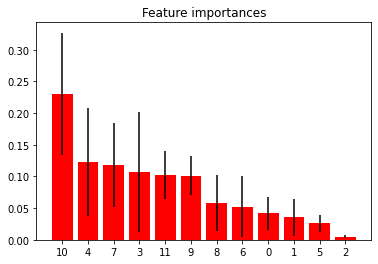

In [8]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()